UNSW-NB15 dataset

Explanation of Key Features:



* **id**: A unique identifier for each record.
*  **dur** (duration): Duration of the connection in seconds, indicating how long a connection lasts. Longer durations or unusuall short session may indicate certain attack behaviours
*  **proto** (protocol): The protocol used for the connection (e.g., TCP, UDP, ICMP).
*  **service**: Type of service involved (e.g., HTTP, FTP, SMTP).
*  **state**: State of the connection (e.g., FIN, CON, INT). Monitoring connections states can reveal irregularities such half open connections or abnormal terminations often seen in reconnaissance or denial-of service attacks.
*  **spkts** (source packets): Number of packets sent by the source. Hig or low packet counts could signify flood attacks or incomplete scans.
*  **dpkts** (destination packets): Number of packets received by the destination. In case there is disparities between source and destination packet counts can hint at dropped packets , congestion or deliberate interference.
*  **sbytes** (source bytes): Number of bytes sent by the source. Large payloads may be indicative of data exfiltration or very small values could indicate certain scanning techniques.
* **dbytes** (destination bytes): Number of bytes received by the destination.Unusual values might singal malicious behaviour like large data dumps or command-and-control communications.
*  **rate**: Traffic flow rate. Hight throughput or sudden spikes can correlate with bursty attacks like DDoS
* **sttl** (source time-to-live): The TTL value set by the source; used in analyzing packet lifetimes.Alterede TTL values mcould indicate spoofed packets.
*  **dttl** (destination time-to-live): The TTL value set by the destination.
*  **sload** (source load): Load on the source during the connection.
*  **dload** (destination load): Load on the destination during the connection.
* **sloss** (source loss): Number of packets lost by the source.Excessive packet loss could point to congestion or malicious traffic being dropped by security devices
*  **dloss** (destination loss): Number of packets lost by the destination.
* **sinpkt** (source inter-packet arrival time): Time between packets sent by the source.
* **dinpkt** (destination inter-packet arrival time): Time between packets received by the destination.
* **sjit** (source jitter): Jitter in the packet flow from the source. Unusual jitter patters might be congestion or deliberate timing obfuscation by attackers.
* **djit** (destination jitter): Jitter in the packet flow to the destination.
* **swin** (source window size): The size of the source's TCP window. Attackers can manipulate windows sizes to disrupt normal flow or disguise malicious patters.
* **stcpb** (source TCP base sequence number): TCP sequence number from the source.Suspicious manipulation of sequence numbers can be tied to attacks like session hijacking.
* **dtcpb** (destination TCP base sequence number): TCP sequence number from the destination.
* **dwin** (destination window size): The size of the destination's TCP window.
* **tcprtt** (TCP round-trip time): Round-trip time for TCP packets.
* **synack**: Time between SYN and ACK packets.
* **ackdat**: Time between ACK packets.Extended or irregular intervals might reflect disrupted communications caused by an attack
* **smean** (source mean): Mean of the source's data.Atypical distributions of sizes could mark unusual payload patterns.
* **dmean** (destination mean): Mean of the destination's data.
* **trans_depth**: The depth of the connection, indicating levels of HTTP transactions.
* **response_body_len**: Length of the response body.Unusually large responses might point to data leakage, while very small or no response might align with scanning or failed exploit attempts.
* **ct_srv_src**: Count of connections to the same service from the same source. Multiple repeated attempts can signal brute-force attacks or persistent scanning.
* **ct_state_ttl**: Count of connections with the same state and TTL.Recurrent patterns could hint at automated tools trying the same exploit repeatedly.
* **ct_dst_ltm**: Count of connections to the same destination over time.
* **ct_src_dport_ltm**: Count of connections from the same source to a specific destination port over time.
* **ct_dst_sport_ltm**: Count of connections to the same destination from a specific source port over time.
* **ct_dst_src_ltm**: Count of connections between the same source and destination.
* **is_ftp_login**: Binary indicator of whether an FTP login attempt was made.Attackers often try brute-force credentials, making this a direct indicator of malicious behavior.
* **ct_ftp_cmd**: Number of FTP commands in the connection.Excessive commands may suggest attempted exploitation, brute force, or reconnaissance on FTP servers.
* **ct_flw_http_mthd**: Number of HTTP methods used in the connection.. Attackers may use unusual or numerous HTTP methods to discover server vulnerabilities.
* **ct_src_ltm**: Count of connections from the same source over time.
* **ct_srv_dst**: Count of connections to the same service at the destination.
* **is_sm_ips_ports**: Binary indicator if the source and destination IPs and ports are the same.
* **attack_cat**: The category of the attack (e.g., DoS, Probe, Normal).This is essential for supervised learning tasks, as it allows for multi-class classification and deeper insight into what type of attack is occurring.
* **label**: Binary classification label (0 for normal traffic, 1 for malicious traffic).This is the primary variable used in classification tasks to evaluate the effectiveness of detection algorithms.

In [3]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Paths to the CSV files in the 'datasets' folder
training_set_path = '/content/drive/My Drive/datasets/UNSW_NB15_training-set.csv'
testing_set_path = '/content/drive/My Drive/datasets/UNSW_NB15_testing-set.csv'



In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the training, testing, and feature CSV files
training_df = pd.read_csv(training_set_path)
testing_df = pd.read_csv(testing_set_path)


# Display the first few rows of each dataframe to ensure they loaded correctly
print("Training Set:")
print(training_df.head())

print("\nTesting Set:")
print(testing_df.head())



Training Set:
   id       dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
0   1  0.121478   tcp       -   FIN      6      4     258     172  74.087490   
1   2  0.649902   tcp       -   FIN     14     38     734   42014  78.473372   
2   3  1.623129   tcp       -   FIN      8     16     364   13186  14.170161   
3   4  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108   
4   5  0.449454   tcp       -   FIN     10      6     534     268  33.373826   

   ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
0  ...                 1               1             0           0   
1  ...                 1               2             0           0   
2  ...                 1               3             0           0   
3  ...                 1               3             1           1   
4  ...                 1              40             0           0   

   ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  \
0       

In [6]:
# We are checkign here the total number of rows and columns from the training and test dataset.

print("Training data shape:", training_df.shape)
print("Testing data shape:", testing_df.shape)


Training data shape: (175341, 45)
Testing data shape: (82332, 45)


In [7]:
# here we are check if there are any missing values.

print(training_df.isnull().sum())
print(testing_df.isnull().sum())


id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [8]:
# we check the type of data of each column
print(training_df.dtypes)


id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

The data indicates that most of the features are numeric but still there are a few columns with object types like proto , service , state and attack_cat

In [9]:
# here we check how many unique categories we have in each categorical column
print("Unique proto:", training_df['proto'].nunique())
print("Unique service:", training_df['service'].nunique())
print("Unique state:", training_df['state'].nunique())
print("Unique attack_cat:", training_df['attack_cat'].nunique())


Unique proto: 133
Unique service: 13
Unique state: 9
Unique attack_cat: 10


The feature proto has a huge large of categories - For this normally it is used label encoding

In [10]:
# Display all unique attack categories in the training set
print(training_df['attack_cat'].unique())

# Display the number of instances for each category
print(training_df['attack_cat'].value_counts())


['Normal' 'Backdoor' 'Analysis' 'Fuzzers' 'Shellcode' 'Reconnaissance'
 'Exploits' 'DoS' 'Worms' 'Generic']
attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: count, dtype: int64




*   **Generic** ->  not tied to a specific protocol or exploit type
*   **Exploits** -> target vulnerabilities in software, services, or systems
*   **Fuzzers** -> involves sending large amounts of malformed, unexpected, or random data to a system or application
*  **DoS (Denial of Service)** DoS attacks flood a target with excessive traffic or requests, overloading its resources and making it unavailable to legitimate users.
*    **Reconnaissance** -> These involve gathering information about a target system or network without directly exploiting it.
*   **Analysis** -> Involve more passive methods of examining data, such as sniffing network packets or using tools to analyze traffic flow
*   **Backdoor** -> A backdoor is a hidden entry point into a system that bypasses standard authentication or security controls.
*   **Shellcode** -> involve sending a small piece of malicious code (shellcode) that the target’s system executes directly
*   **Worms** -> Worms are self-replicating malware that spread automatically across networks without human interaction.









In [11]:
print(training_df.describe())


                  id            dur          spkts          dpkts  \
count  175341.000000  175341.000000  175341.000000  175341.000000   
mean    87671.000000       1.359389      20.298664      18.969591   
std     50616.731112       6.480249     136.887597     110.258271   
min         1.000000       0.000000       1.000000       0.000000   
25%     43836.000000       0.000008       2.000000       0.000000   
50%     87671.000000       0.001582       2.000000       2.000000   
75%    131506.000000       0.668069      12.000000      10.000000   
max    175341.000000      59.999989    9616.000000   10974.000000   

             sbytes        dbytes          rate           sttl           dttl  \
count  1.753410e+05  1.753410e+05  1.753410e+05  175341.000000  175341.000000   
mean   8.844844e+03  1.492892e+04  9.540619e+04     179.546997      79.609567   
std    1.747656e+05  1.436542e+05  1.654010e+05     102.940011     110.506863   
min    2.800000e+01  0.000000e+00  0.000000e+00       

This statistical summary, provided by training_df.describe(), gives a high-level overview of the numeric features in  UNSW NB15  dataset

* **count**: Number of non-null values in each column
* **mean**: The average value for each column.
* **std**: The standard deviation, indicating how much the values spread around the mean.
* **min and max**: The smallest and largest values in each column.
* **25%, 50%, 75%: The quartiles**. The 50% (median) value is particularly useful for understanding the distribution. For instance, if the median is very different from the mean, it might indicate a skewed distribution.

In [12]:
print(training_df['label'].value_counts())
print(testing_df['label'].value_counts())


label
1    119341
0     56000
Name: count, dtype: int64
label
1    45332
0    37000
Name: count, dtype: int64


In [13]:
# Filter rows where 'attack_cat' is 'Exploits'
exploits_df = training_df[training_df['attack_cat'] == 'Exploits']

# Display basic descriptive statistics
print("Descriptive Statistics for Exploits:")
print(exploits_df.describe())

# Check for unique values in categorical columns of interest
print("\nProtocols in Exploits Traffic:")
print(exploits_df['proto'].unique())

print("\nServices in Exploits Traffic:")
print(exploits_df['service'].unique())

print("\nStates in Exploits Traffic:")
print(exploits_df['state'].unique())


Descriptive Statistics for Exploits:
                  id           dur         spkts         dpkts        sbytes  \
count   33393.000000  33393.000000  33393.000000  33393.000000  3.339300e+04   
mean    94704.938191      2.258554     32.717516     22.161830  2.834432e+04   
std     31466.081698      7.842914    266.665821    106.254892  3.541032e+05   
min     48933.000000      0.000000      1.000000      0.000000  6.000000e+01   
25%     68644.000000      0.000009      2.000000      0.000000  2.000000e+02   
50%     91189.000000      0.486540     10.000000      8.000000  8.280000e+02   
75%    114431.000000      1.373214     20.000000     18.000000  1.384000e+03   
max    175306.000000     59.999046   9616.000000   3698.000000  1.296523e+07   

             dbytes          rate          sttl          dttl         sload  \
count  3.339300e+04  3.339300e+04  33393.000000  33393.000000  3.339300e+04   
mean   1.670278e+04  7.364676e+04    175.934956    149.990477  6.531028e+07   
std  

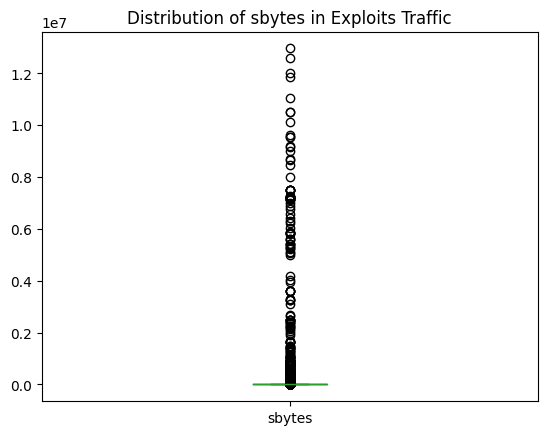

In [14]:
exploits_df['sbytes'].plot(kind='box')
plt.title('Distribution of sbytes in Exploits Traffic')
plt.show()


most exploit records involve small data exchanges, some exploit attempts send extremely large volumes of data, possibly as part of large payload delivery, multiple attempts to exploit a vulnerability, or some kind of data exfiltration or intensive scanning phase.This distribution suggests a high level of variability in how exploits manifest in network traffic. Not all exploits are subtle and small; some are characterized by sending huge volumes of data.

In [15]:
# Filter rows where 'attack_cat' is 'DoS'
dos_df = training_df[training_df['attack_cat'] == 'DoS']

# Display basic statistics for the DoS subset
print(dos_df.describe())

# Check for unique values in categorical columns related to DoS
print("\nProtocols in DoS Traffic:")
print(dos_df['proto'].unique())

print("\nServices in DoS Traffic:")
print(dos_df['service'].unique())

print("\nStates in DoS Traffic:")
print(dos_df['state'].unique())


                  id           dur         spkts         dpkts        sbytes  \
count   12264.000000  12264.000000  12264.000000  12264.000000  1.226400e+04   
mean    96876.255545      2.574937     22.524625     18.689008  1.727201e+04   
std     30428.931533     10.439241    230.994169    277.031590  2.963956e+05   
min     49000.000000      0.000000      1.000000      0.000000  6.000000e+01   
25%     71877.250000      0.000005      2.000000      0.000000  2.000000e+02   
50%     93093.000000      0.000009      2.000000      0.000000  2.000000e+02   
75%    116252.250000      0.240537      4.000000      0.000000  5.690000e+02   
max    175249.000000     59.998409   8070.000000  10974.000000  1.067801e+07   

             dbytes          rate          sttl          dttl         sload  \
count  1.226400e+04  1.226400e+04  12264.000000  12264.000000  1.226400e+04   
mean   1.896922e+04  1.515748e+05    232.846217     48.161448  1.262814e+08   
std    3.674002e+05  1.868717e+05     60.8

The “strange” or “outlier” values in DoS attacks are generally the extraordinarily high counts of **packets**  ( dur, spkts,dpkts)  **bytes** ( sbytes, dbytes) , **rate** (rate) , and **load** (sload, dload ) . These clearly stand out compared to the median and lower quartiles.  The proto column lists a large number of protocols, many of which are uncommon or obsolete. The presence of so many different protocols could be due to the simulation environment that generated the dataset.

This dataset includes both numerical and categorical features that describe network connections.
The target columns, attack_cat and label, are used to differentiate between normal and anomalous/malicious traffic.
The label column is particularly important for binary classification tasks, indicating whether the traffic is normal (0) or an attack (1).
The attack_cat column provides more detailed information about the type of attack, which can be used for multi-class classification.

**Correlation matrix**  A correlation matrix quantifies the degree to which pairs of variables are related. High correlation between two variables suggests that they carry similar information, indicating that one may be redundant and can be removed from the dataset to simplify the model

 In the context of machine learning, the correlation matrix helps in feature selection by identifying features that are highly correlated with the target variable but less correlated with each other. This is crucial for building effective models, as it reduces multicollinearity and enhances model performance

In [16]:
#Aqui calculem la correlation matrix pero exloent els valors numerics.

# Select only numeric columns and drop the 'id' column
numeric_df = training_df.select_dtypes(include=['number']).drop(columns=['id'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Extract correlation scores for the target variable (assuming the target column is 'label')
target_correlations = correlation_matrix['label'].sort_values(ascending=False)

# Create a DataFrame to display the results as a table
correlation_table = pd.DataFrame({
    'Feature': target_correlations.index,
    'Correlation Score': target_correlations.values
})

# Exclude the target variable itself from the table
correlation_table = correlation_table[correlation_table['Feature'] != 'label']

# Add a ranking column
correlation_table['Rank'] = range(1, len(correlation_table) + 1)

# Display the correlation table
print(correlation_table)

# Optionally, display the top 10 features
print("\nTop 10 Features by Correlation Score:")
print(correlation_table.head(10))

              Feature  Correlation Score  Rank
1                sttl           0.692741     1
2        ct_state_ttl           0.577704     2
3    ct_dst_sport_ltm           0.357213     3
4                rate           0.337979     4
5    ct_src_dport_ltm           0.305579     5
6      ct_dst_src_ltm           0.303855     6
7          ct_src_ltm           0.238225     7
8          ct_dst_ltm           0.229887     8
9          ct_srv_src           0.229044     9
10         ct_srv_dst           0.228046    10
11              sload           0.182870    11
12             ackdat           0.097364    12
13               dttl           0.095049    13
14             tcprtt           0.081584    14
15             synack           0.058299    15
16                dur           0.036175    16
17             sbytes           0.018576    17
18   ct_flw_http_mthd           0.015800    18
19        trans_depth           0.010801    19
20              sloss          -0.000640    20
21           

We need to encode the categorical values so then can calculate the correlation matrix . We can use Label Encoding or One-hot encoding.


In [17]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns using LabelEncoder
categorical_cols = ['proto', 'service', 'state', 'attack_cat']

training_df_encoded = training_df.copy()  # Work on a copy of the DataFrame
for col in categorical_cols:
    le = LabelEncoder()
    training_df_encoded[col] = le.fit_transform(training_df_encoded[col])

In [18]:
# Select only numeric columns and drop 'id' (if not useful for correlation)
numeric_df = training_df_encoded.select_dtypes(include=['number']).drop(columns=['id'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Extract correlation scores for the target variable (label)
target_correlations = correlation_matrix['label'].sort_values(ascending=False)

# Create a DataFrame to display the results as a table
correlation_table = pd.DataFrame({
    'Feature': target_correlations.index,
    'Correlation Score': target_correlations.values
})

# Exclude the target variable itself from the table
correlation_table = correlation_table[correlation_table['Feature'] != 'label']

# Add a ranking column
correlation_table['Rank'] = range(1, len(correlation_table) + 1)

# Display the correlation table
print("\nCorrelation Table:")
print(correlation_table)

# Optionally, display the top 10 features
print("\nTop 10 Features by Correlation Score:")
print(correlation_table.head(10))



Correlation Table:
              Feature  Correlation Score  Rank
1                sttl           0.692741     1
2        ct_state_ttl           0.577704     2
3               state           0.497685     3
4    ct_dst_sport_ltm           0.357213     4
5                rate           0.337979     5
6    ct_src_dport_ltm           0.305579     6
7      ct_dst_src_ltm           0.303855     7
8          ct_src_ltm           0.238225     8
9          ct_dst_ltm           0.229887     9
10         ct_srv_src           0.229044    10
11         ct_srv_dst           0.228046    11
12              sload           0.182870    12
13             ackdat           0.097364    13
14               dttl           0.095049    14
15             tcprtt           0.081584    15
16             synack           0.058299    16
17                dur           0.036175    17
18            service           0.035052    18
19              proto           0.020267    19
20             sbytes           0.018576

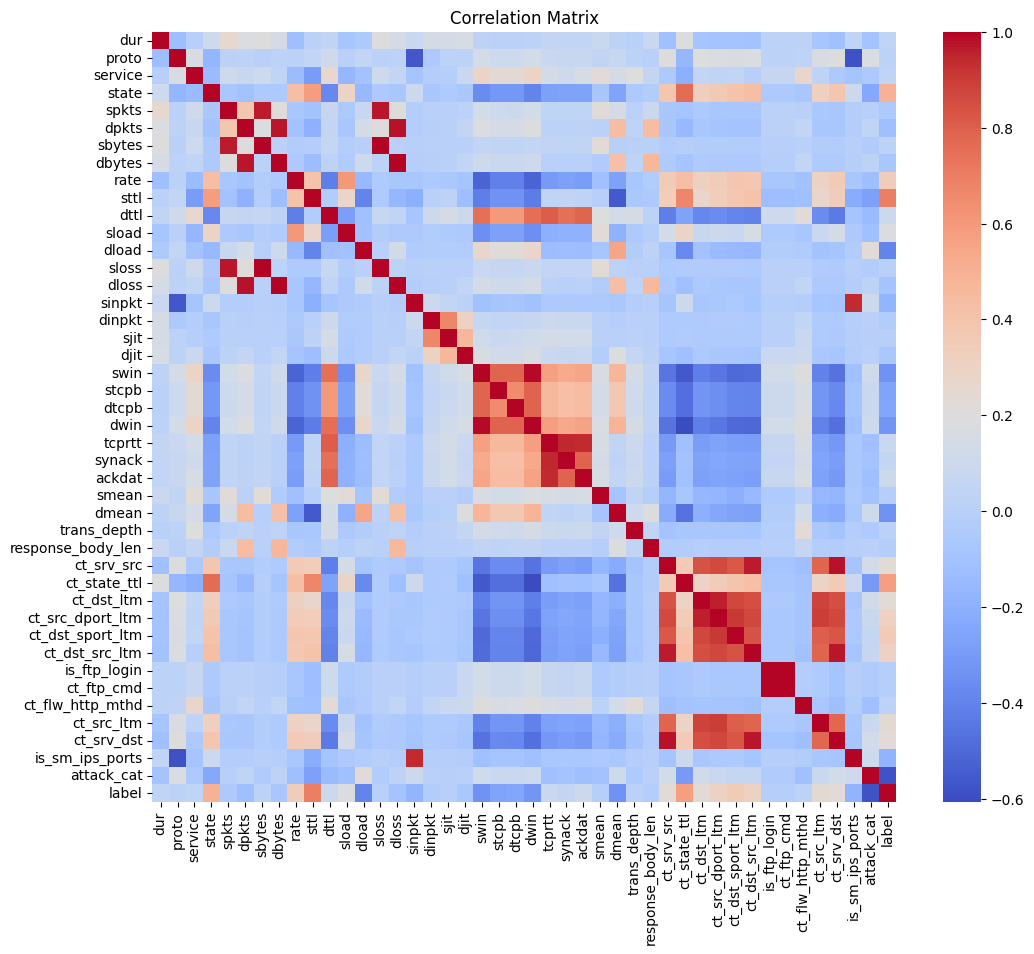

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


**Top Features**

*   **sttl** - source time-to-live - TTL values often reflect network characteristics or attacker behaviour.
*   **ct_state_ttl**- A high correlation suggest that connection with similar TTL and state values are strongly associated with malicious or normal trafic.

*   **state** - The state of the connection (e.g., FIN, CON, REQ) is indicative of the traffic’s nature. Some states, such as interrupted (INT), may occur more frequently in malicious scenarios.
*   **ct_dst_sport_ltm** This indicates that frequent connections to the same destination and source port could be a sign of malicious activity, such as scanning or flooding attacks.

*   **rate** - A higher traffic rate is often indicative of attacks like DoS or DDoS, where attackers overwhelm the system.
*   **ct_src_dport_ltm** - Repeated connections to specific ports are characteristic of port scans or exploitation attempts.
*   **ct_dst_src_ltm**  - Repeated interactions between the same source and destination might suggest reconnaissance or probing behavior
*   **ct_src_ltm, ct_dst_ltm, ct_srv_src, and ct_srv_dst** - These features collectively indicate repeated traffic to or from specific sources, destinations, or services. These patterns are often seen in malicious traffic (e.g., botnets, scans)








In [20]:
# Define the top features based on your correlation matrix
top_features = ['sttl', 'ct_state_ttl', 'state', 'ct_dst_sport_ltm', 'rate',
                'ct_src_dport_ltm', 'ct_dst_src_ltm', 'ct_src_ltm', 'ct_dst_ltm', 'ct_srv_src']

# Define the target variable
target = 'label'


In [21]:
# Assume top_features and target are already defined
X = training_df_encoded[top_features]
y = training_df_encoded[target]

# Now split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [22]:
# Assume top_features and target are already defined
X = training_df_encoded[top_features]
y = training_df_encoded[target]

# Now split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
from sklearn.preprocessing import StandardScaler

# Scale the data after defining X_train and X_test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
import xgboost as xgb

# List of models to train and evaluate
models = {
    'Naive Bayes': GaussianNB(),
    'LDA': LDA(),
    'KNN': KNeighborsClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'AdaBoost': AdaBoostClassifier(),
    'SGD': SGDClassifier(),
    'Logistic Regression': LogisticRegression()
}

# Function to train and evaluate models
def evaluate_models(X_train, X_test, y_train, y_test):
    results = {}

    for name, model in models.items():
        print(f"Training {name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calculate performance metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=1)
        recall = recall_score(y_test, y_pred, zero_division=1)
        f1 = f1_score(y_test, y_pred, zero_division=1)

        # Store results
        results[name] = {
            'Accuracy': round(accuracy * 100, 2),
            'Precision': round(precision * 100, 2),
            'Recall': round(recall * 100, 2),
            'F1 Score': round(f1 * 100, 2)
        }

    return pd.DataFrame.from_dict(results, orient='index')

# Evaluate the models using the prepared data
results = evaluate_models(X_train_scaled, X_test_scaled, y_train, y_test)
print("\nModel Performance with Top Features:")
print(results)


Training Naive Bayes...
Training LDA...
Training KNN...
Training XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:01:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Decision Tree...
Training Random Forest...
Training SVM...
Training AdaBoost...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training SGD...
Training Logistic Regression...

Model Performance with Top Features:
                     Accuracy  Precision  Recall  F1 Score
Naive Bayes             66.18      95.14   53.08     68.15
LDA                     84.26      89.93   86.60     88.24
KNN                     93.93      94.53   96.69     95.59
XGBoost                 94.39      93.78   98.29     95.98
Decision Tree           93.64      95.13   95.56     95.35
Random Forest           94.20      94.97   96.61     95.78
SVM                     93.11      91.45   99.17     95.15
AdaBoost                93.09      92.36   97.96     95.08
SGD                     84.35      89.89   86.81     88.32
Logistic Regression     83.43      88.48   87.01     87.74


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize a base model
rf_model = RandomForestClassifier(random_state=42)

# Initialize the grid search
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid,
                           scoring='f1',
                           cv=5,            # 5-fold cross-validation
                           verbose=2,       # For detailed output
                           n_jobs=-1)       # Use all available CPU cores

# Fit the grid search on the training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)
print("Best F1-score:", grid_search.best_score_)

# Use the best estimator for predictions
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test_scaled)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
71 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py",

Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best F1-score: 0.9620272582304867
